# U1B model: neutrino masses

The idea is to check the neutrino mases to one loop.
Leshouches dictionary, SPHENO_4.0.3, micromegas_5.0.4

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator

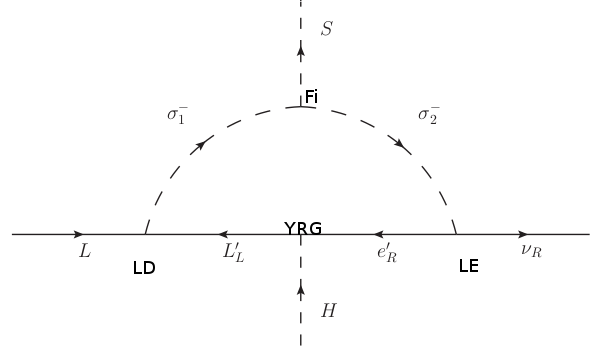

In [3]:
from IPython.display import Image
Image("zee-couplings.png")

run diccionary

In [4]:
# Tiempo inicial
t1=time.time() 

x=[]

Num = 5

for i in range (0,Num):
    
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    L2 = -7.23E-2
    YA1 = 0.6
    YC1 = 1.0 #control the Fvv mass
    vx = np.random.uniform(1500,3000)
    YRG = 5.1E-1
    
    Fi11 = 0.112
    Fi12 = 0.1
    Fi21 = 0.2
    Fi22 = 0.3
    
    LD11 = 1.1E-1
    LD12 = 1.2E-1
    LD13 = 1.2E-2
    LD21 = 1.1E-2
    LD22 = 1.3E-2
    LD23 = 1.21E-2
    
    LE11 = 1.11E-1
    LE12 = 1.12E-1
    LE21 = 1.13E-1
    LE22 = 1.14E-2
    
    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%L2
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx
    
    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22
    
    xdict.blocks['LDIN'].entries[1,1]='%.6E    # LD(1,1)'%LD11
    xdict.blocks['LDIN'].entries[1,2]='%.6E    # LD(1,2)'%LD12
    xdict.blocks['LDIN'].entries[1,3]='%.6E    # LD(1,3)'%LD13
    xdict.blocks['LDIN'].entries[2,1]='%.6E    # LD(2,1)'%LD21
    xdict.blocks['LDIN'].entries[2,2]='%.6E    # LD(2,2)'%LD22
    xdict.blocks['LDIN'].entries[2,3]='%.6E    # LD(2,3)'%LD23
    
    xdict.blocks['LEIN'].entries[1,1]='%.6E    # LE(1,1)'%LE11
    xdict.blocks['LEIN'].entries[1,2]='%.6E    # LE(1,2)'%LE12
    xdict.blocks['LEIN'].entries[2,1]='%.6E    # LE(2,1)'%LE21
    xdict.blocks['LEIN'].entries[2,2]='%.6E    # LE(2,2)'%LE22
                
    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

    #run SPheno
    spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
    so = subprocess.getoutput('cat SPheno.spc.U1B')
    
    #capturo algo de spheno
    MZp = eval(so.split('# VWm')[1].split()[1])
    mnu1 = np.abs(eval(so.split('# Fe_3')[1].split()[1]))
    mnu2 = np.abs(eval(so.split('# Fe_3')[1].split()[5]))
    mnu3 = np.abs(eval(so.split('# Fe_3')[1].split()[13]))
    
    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])
    
    mH2=eval(so.split('Block MASS')[1].split()[17])
    mH3=eval(so.split('Block MASS')[1].split()[21])
    mH4=eval(so.split('Block MASS')[1].split()[25])
    mH5=eval(so.split('Block MASS')[1].split()[29])
    meD1=eval(so.split('# Fvv')[1].split()[1])
    meD2=eval(so.split('# Fvv')[1].split()[5])
    
    VL11=eval(so.split('Block UELDMIX')[1].split()[6])
    VL12=eval(so.split('Block UELDMIX')[1].split()[11])
    VL21=eval(so.split('Block UELDMIX')[1].split()[16])
    VL22=eval(so.split('Block UELDMIX')[1].split()[21])

    UL11=eval(so.split('Block UERDMIX')[1].split()[6])
    UL12=eval(so.split('Block UERDMIX')[1].split()[11])
    UL21=eval(so.split('Block UERDMIX')[1].split()[16])
    UL22=eval(so.split('Block UERDMIX')[1].split()[21])
     
    x.append([L2,YA1,YC1,vx,YRG,Fi11,Fi12,Fi21,Fi22,LD11,LD12,LD13,LD21,LD22,LD23,LE11,LE12,LE21,LE22,MZp,\
              mnu1,mnu2,mnu3,ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,ZP45,ZP52,ZP53,ZP54,ZP55,\
             mH2,mH3,mH4,mH5,meD1,meD2,VL11,VL12,VL21,VL22,UL11,UL12,UL21,UL22])

x=np.asarray(x)
xd=pd.DataFrame(x,columns=['L2','YA1','YC1','vx','YRG','Fi11','Fi12','Fi21','Fi22','LD11','LD12','LD13',\
                           'LD21','LD22','LD23','LE11','LE12','LE21','LE22','MZp','mnu1','mnu2','mnu3',\
                           'ZP22','ZP23','ZP24','ZP25','ZP32','ZP33','ZP34','ZP35','ZP42','ZP43','ZP44',\
                           'ZP45','ZP52','ZP53','ZP54','ZP55','mH2','mH3','mH4','mH5','meD1','meD2',\
                           'VL11','VL12','VL21','VL22','UL11','UL12','UL21','UL22'])  

t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 11.995489120483398 s running 5 times


In [12]:
xd[['mnu1','mnu2','mnu3','VL11']]

,mnu1,mnu2,mnu3,VL11
0,4.865113e-27,1.855930e-10,5.702407e-08,-0.012509
1,4.797591e-27,1.368801e-10,4.358045e-08,-0.017733
2,3.252077e-27,1.582111e-10,4.959494e-08,-0.015060
3,2.404554e-27,1.932612e-10,5.904738e-08,-0.011921
4,7.028730e-27,1.342022e-10,4.281098e-08,-0.018126


Neutrino rutine funtions

In [10]:
import neutrino_analytic

In [9]:
neutrino_analytic.SUML(2,3,4,1,0.5,1,0.2)

0.047640438298904977

In [10]:
neutrino_analytic.Lj(0.2,0.3,100,200,300,0.2,0.3,1,1)

0.36362510170408341

In [11]:
neutrino_analytic.Lab(0.1,1,0.3,.8,.5,.6,.8,.2,100,200,300,400,500,600,.2,.5,.6,.3)

3.4980371542795701

Neutrino $M_{ij}^{\nu}$ matrix:

\begin{equation}
M_{ik}^{\nu} = (h_d)^{\alpha i} \Lambda^{\alpha\beta} (h_e)^{\beta k}
\end{equation}

In [13]:
neutrino_analytic.Mab(xd.ZP22[0],xd.ZP23[0],xd.ZP24[0],xd.ZP25[0],xd.ZP32[0],xd.ZP33[0],xd.ZP34[0],xd.ZP35[0],xd.ZP42[0],xd.ZP43[0],\
                           xd.ZP44[0],xd.ZP45[0],xd.ZP52[0],xd.ZP53[0],xd.ZP54[0],xd.ZP55[0],xd.meD1[0],xd.meD2[0],\
    xd.mH2[0],xd.mH3[0],xd.mH4[0],xd.mH5[0],xd.VL11[0],xd.VL21[0],xd.UL11[0],xd.UL21[0],xd.LD11[0],xd.LD12[0],\
    xd.LD13[0],xd.LD21[0],xd.LD22[0],xd.LD23[0],xd.LE11[0],xd.LE12[0],0.,xd.LE21[0],xd.LE22[0],0.)

(2.040494988605009e-16, 1.855929641467877e-10, 5.7024066145491543e-08)

vectorize not working

In [ ]:
'''
#Add to the DataFrame  not working
neutrino_analytic.MatrixDiag_new(xd.ZP22,xd.ZP23,xd.ZP24,xd.ZP25,xd.ZP32,xd.ZP33,xd.ZP34,xd.ZP35,xd.ZP42,xd.ZP43,xd.ZP44,xd.ZP45,\
               xd.ZP52,xd.ZP53,xd.ZP54,xd.ZP55,xd.meD1,xd.meD2,xd.mH2,xd.mH3,xd.mH4,xd.mH5,xd.VL11,xd.VL21,\
               xd.UL11,xd.UL21,xd.LD11,xd.LD12,xd.LD13,xd.LD21,xd.LD22,xd.LD23,xd.LE11,xd.LE12,0.,xd.LE21,xd.LE22,0.)

'''

In [14]:
y=[]

for i in range(0,xd.shape[0]):
    
    a = neutrino_analytic.Mab(xd.ZP22[i],xd.ZP23[i],xd.ZP24[i],xd.ZP25[i],xd.ZP32[i],xd.ZP33[i],xd.ZP34[i],xd.ZP35[i],xd.ZP42[i],xd.ZP43[i],\
                           xd.ZP44[i],xd.ZP45[i],xd.ZP52[i],xd.ZP53[i],xd.ZP54[i],xd.ZP55[i],xd.meD1[i],xd.meD2[i],\
    xd.mH2[i],xd.mH3[i],xd.mH4[i],xd.mH5[i],xd.VL11[i],xd.VL21[i],xd.UL11[i],xd.UL21[i],xd.LD11[i],xd.LD12[i],\
    xd.LD13[i],xd.LD21[i],xd.LD22[i],xd.LD23[i],xd.LE11[i],xd.LE12[i],0.,xd.LE21[i],xd.LE22[i],0.)
    
    mn1 = a[0]
    mn2 = a[1]
    mn3 = a[2]
    
    y.append([mn1,mn2,mn3])

y=np.asarray(y)
yd=pd.DataFrame(y,columns=['mn1','mn2','mn3'])

In [15]:
yd[:2]

,mn1,mn2,mn3
0,2.040495e-16,1.855930e-10,5.702407e-08
1,7.389922e-16,1.368801e-10,4.358045e-08


In [16]:
xd[['mnu1','mnu2','mnu3']][:2]

,mnu1,mnu2,mnu3
0,4.865113e-27,1.855930e-10,5.702407e-08
1,4.797591e-27,1.368801e-10,4.358045e-08


In [17]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

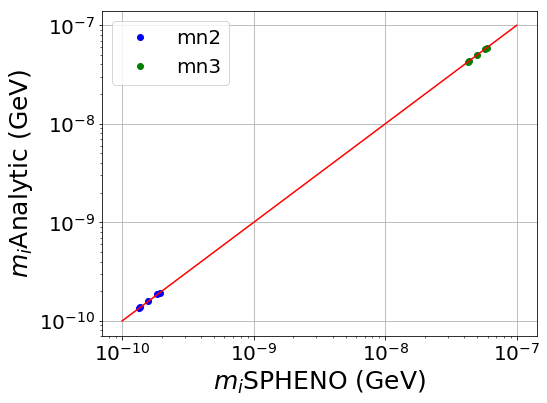

In [18]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mnu2,yd.mn2,'bo')
plt.loglog(xd.mnu3,yd.mn3,'go')

a = np.linspace(1e-10,1e-07,20)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')